In [28]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue 

a) Когда каждое окошко может принять не более двух человек:

   Генерируем выборку экспоненциального распределения размера `count_windows` (количесво окошек) с `alpha`, сортируем ее, чтобы воссоздать порядок очереди. Повторяем эксперимент 1000 раз.
   
   Исходя из графиков, мы получили, что среднее время ожидания посетителя в очереди экспоненциально зависит от его места.

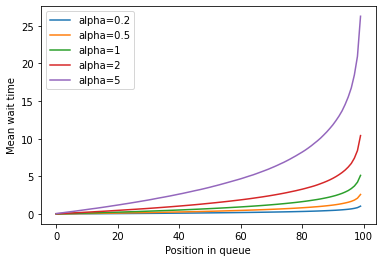

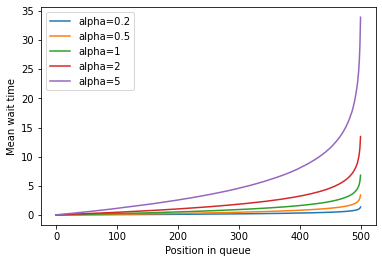

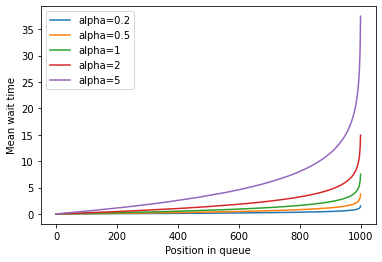

In [29]:
count_windows = [100, 500, 1000]
alpha = [0.2, 0.5, 1, 2, 5]
count_iterations = 1000

for n in count_windows:
    for a in alpha:
        result = np.zeros(n)
        for i in range(count_iterations):
            result += np.sort(np.random.exponential(a, n))

        plt.plot(np.arange(n), result / count_iterations, label=f"alpha={a}")
        plt.xlabel("Position in queue")
        plt.ylabel("Mean wait time")
    plt.legend()
    plt.show()

б) Когда окошки работают реалистично:

   Генерируем выборку экспоненциального распределения размера `count_windows` (количесво окошек) с `alpha`, кладем ее в кучу и `queue_len` (размер очереди - возьмем = число окошек*4) раз достаем минимум из кучи `x` и кладем обратно в очередь x + новый сгенерированный экспоненциально элемент. Так мы воссоздаем поведение реальной очереди. Повторяем эксперимент 100 раз.
   
   Исходя из графиков, мы получили, что среднее время ожидания посетителя в очереди линейно зависит от его места.

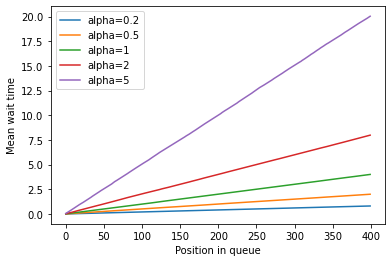

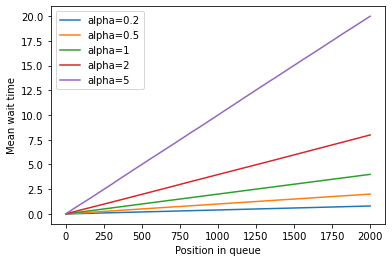

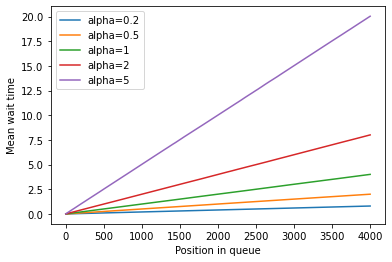

In [30]:
count_windows = [100, 500, 1000]
alpha = [0.2, 0.5, 1, 2, 5]
count_iterations = 100

def recreating_queue(a, n, queue_len):
    first = np.random.exponential(a, n)
    heap = PriorityQueue()
    for i in first:
        heap.put(i)
    answer = np.zeros(queue_len)
    for i in range(answer.size):
        answer[i] = heap.get()
        heap.put(np.random.exponential(a) + answer[i])
    return answer

for n in count_windows:
    for a in alpha:
        queue_len = n*4
        result = np.zeros(queue_len)
        for i in range(count_iterations):
            result += recreating_queue(a, n, queue_len)

        plt.plot(np.arange(queue_len), result / count_iterations, label=f"alpha={a}")
        plt.xlabel("Position in queue")
        plt.ylabel("Mean wait time")
    plt.legend()
    plt.show()